<a href="https://colab.research.google.com/github/sophiastmn/ML_Labs/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

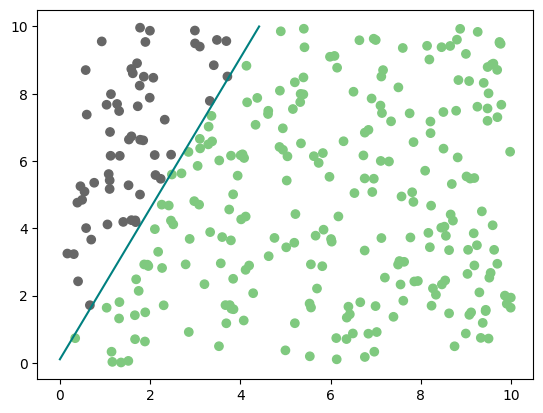

Line: y = 2.240921255168597x + 0.10437089980152892
Initial weights: [0.6005480511315521, 0.5018687482868724]
Initial bias: 0.6078784653581141
Training time: 0.010497808456420898s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|84 | 0 
 Actual: 1|0  | 16
Weights: [-39.156541479453224, 17.080772559035115]
Bias: 0.6078784653581142


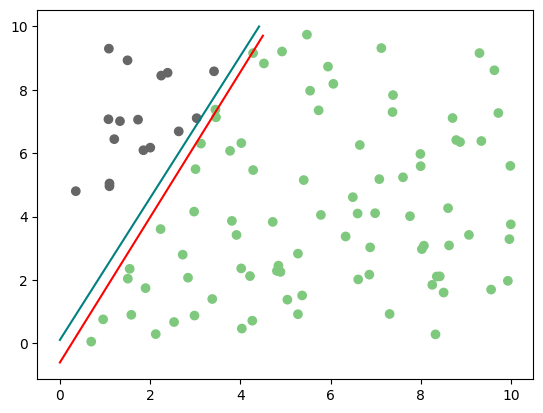

In [24]:
############################################################# Problem #1, no variations ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point):
    return self.activationFunction(self.multiply(point) + self.bias);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value):
    if value >= 0:
      return 1;
    return 0;

def pointGeneration(numPoints, lineSlope, lineY):
  #format for data: [[feature1val, feature2val,  ..., classification]]
  points = [];
  for i in range(numPoints):
    point1 = random.random()*10;
    point2 = random.random()*10
    points.append([point1, point2, classification(point1, point2, lineSlope, lineY)]);
  return points;

def classification(point1, point2, lineSlope, lineY):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = lineSlope*point1 + lineY;
  return int(calculated2 < point2);

def trainPerceptron(perc, points, slope, y, lv):
  continue_question = True;
  w = [random.random() for i in range(len(points[0][:-1]))];
  perc.setWeights(w);
  perc.setBias(random.random());
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, slope, y, lv);

def epoch(perc, points, slope, y, lv):
  change = False;
  for p in points:
    a = perc.returnA(p[:-1]);
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  #generate a random line
  m = random.random()*3; #get a random slope between 0 and 3
  y = random.random()*6; #get a random line between 0 and 6
  learningVariable = 1; #set the learning variable

  #generate random points
  points = pointGeneration(300, m, y);

  #plot the points
  #info from: https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib
  plot.scatter([i[0] for i in points], [i[1] for i in points], c=[i[2] for i in points], cmap="Accent");
  plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
  plot.show();
  print(f"Line: y = {m}x + {y}");

  #make a perceptron
  perc = Perceptron();

  #train the perceptron
  startTime = time.time();
  trainPerceptron(perc, points, m, y, learningVariable);
  endTime = time.time();
  print(f"Training time: {endTime - startTime}s");

  #generate test points
  testPoints = pointGeneration(100, m, y);

  #test the perceptron
  cmatrix = testThePoints(perc, testPoints);
  print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(testPoints)}");
  print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

  #print the weights and bias
  print(f"Weights: {perc.weights}");
  print(f"Bias: {perc.bias}");

  #plot the perceptron
  #y = -w0/w1 x - bias
  plot.scatter([i[0] for i in testPoints], [i[1] for i in testPoints], c=[i[2] for i in testPoints], cmap="Accent");
  plot.plot([0, 4.5], [-perc.bias, -(perc.weights[0]/perc.weights[1])*4.5 - perc.bias], color="red");
  plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
  plot.show();


if __name__ == "__main__":
  main();

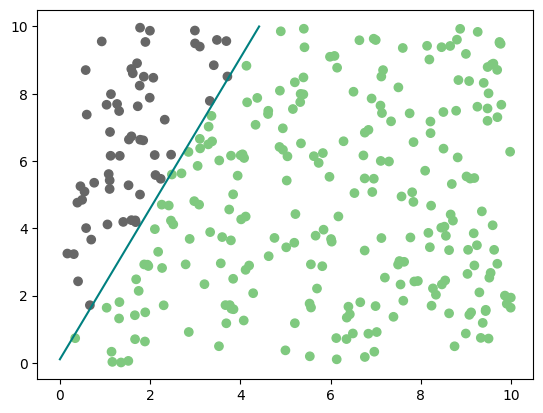

Line: y = 2.240921255168597x + 0.10437089980152892
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.005856513977050781s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-38.724881176875684, 16.89997020386109]
Bias: 0


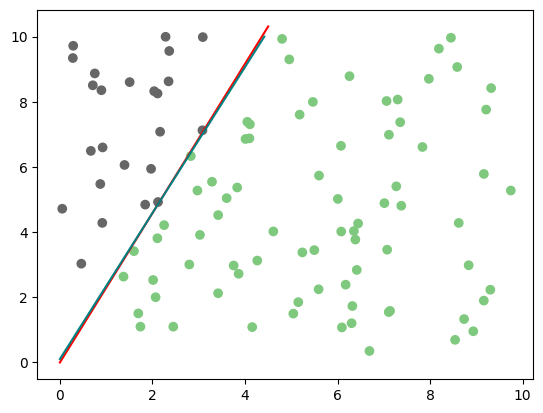

Initial weights: [1, 1]
Initial bias: 1
Training time: 0.017709016799926758s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-49.019489403456745, 21.65959089028856]
Bias: 0


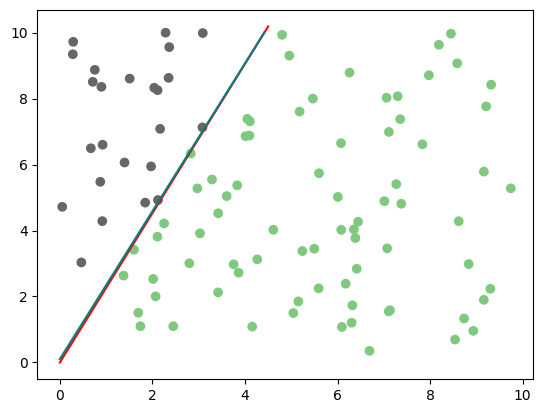

Initial weights: [-1, -1]
Initial bias: 1
Training time: 0.050534963607788086s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-43.9441727048186, 19.48035314763688]
Bias: 0


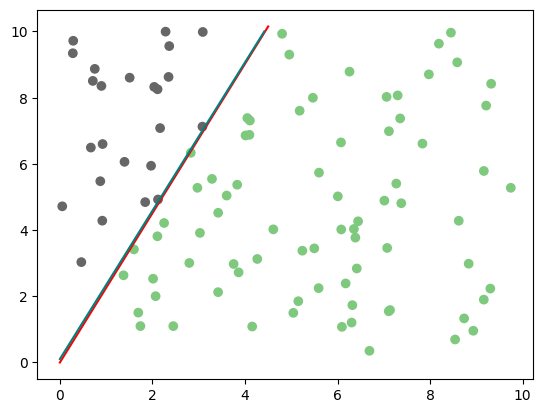

Initial weights: [0, 1]
Initial bias: 1
Training time: 0.016696453094482422s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-49.078107790996086, 21.415565794199058]
Bias: 0


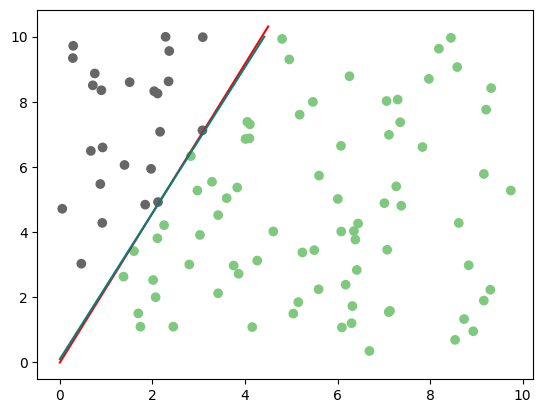

Initial weights: [0, -1]
Initial bias: 1
Training time: 0.017525672912597656s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-52.69765695638248, 22.987381007983952]
Bias: 1


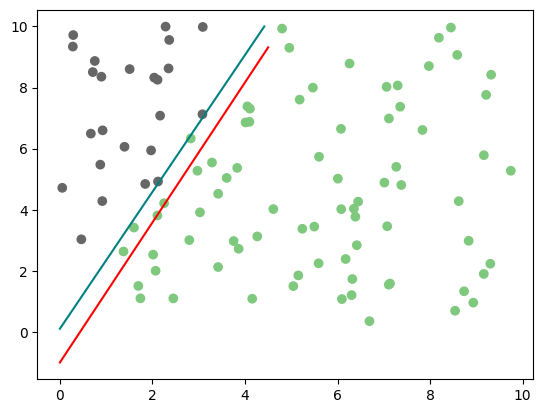

In [27]:
############################################################# Problem #1, different initial weights ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point):
    return self.activationFunction(self.multiply(point) + self.bias);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value):
    if value >= 0:
      return 1;
    return 0;

def pointGeneration(numPoints, lineSlope, lineY):
  #format for data: [[feature1val, feature2val,  ..., classification]]
  points = [];
  for i in range(numPoints):
    point1 = random.random()*10;
    point2 = random.random()*10
    points.append([point1, point2, classification(point1, point2, lineSlope, lineY)]);
  return points;

def classification(point1, point2, lineSlope, lineY):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = lineSlope*point1 + lineY;
  return int(calculated2 < point2);

def trainPerceptron(perc, points, slope, y, lv, w):
  continue_question = True;
  #w = [random.random() for i in range(len(points[0][:-1]))];
  perc.setWeights(w);
  perc.setBias(1);
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, slope, y, lv);

def epoch(perc, points, slope, y, lv):
  change = False;
  for p in points:
    a = perc.returnA(p[:-1]);
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  #generate a random line
  m = random.random()*3; #get a random slope between 0 and 3
  y = random.random()*6; #get a random line between 0 and 6
  learningVariable = 1; #set the learning variable

  #generate random points
  points = pointGeneration(300, m, y);

  #plot the points
  #info from: https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib
  plot.scatter([i[0] for i in points], [i[1] for i in points], c=[i[2] for i in points], cmap="Accent");
  plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
  plot.show();
  print(f"Line: y = {m}x + {y}");


  #generate test points
  testPoints = pointGeneration(100, m, y);

  #perform the different tests
  weights = [[0, 0], [1, 1], [-1, -1], [0, 1], [0, -1]];
  for weight in weights:
    #make a perceptron
    perc = Perceptron();

    #train the perceptron
    startTime = time.time();
    trainPerceptron(perc, points, m, y, learningVariable, weight);
    endTime = time.time();
    print(f"Training time: {endTime-startTime}s");

    #test the perceptron
    cmatrix = testThePoints(perc, testPoints);
    print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(testPoints)}");
    print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

    #print the weights and bias
    print(f"Weights: {perc.weights}");
    print(f"Bias: {perc.bias}");

    #plot the perceptron
    #y = -w0/w1 x - bias
    plot.scatter([i[0] for i in testPoints], [i[1] for i in testPoints], c=[i[2] for i in testPoints], cmap="Accent");
    plot.plot([0, 4.5], [-perc.bias, -(perc.weights[0]/perc.weights[1])*4.5 - perc.bias], color="red");
    plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
    plot.show();


if __name__ == "__main__":
  main();

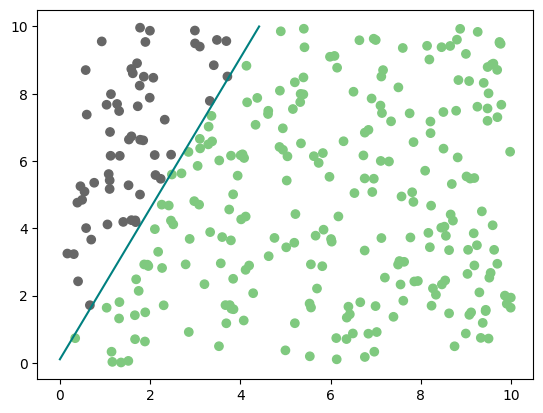

Line: y = 2.240921255168597x + 0.10437089980152892
Learning rate: 0.0001
Initial weights: [0, 0]
Initial bias: 1
Training time: 1.6555359363555908s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-0.6253515926583907, 0.2712152627810701]
Bias: 0.013400000000093792


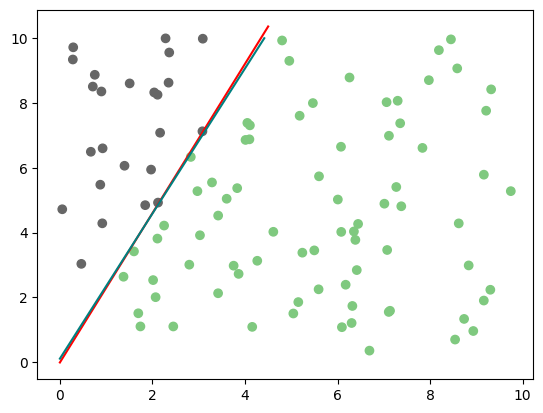

Learning rate: 0.01
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.024831056594848633s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-1.000020071068717, 0.4470465827237029]
Bias: -0.04000000000000076


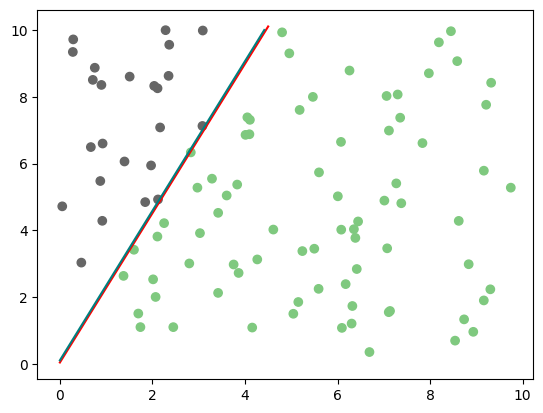

Learning rate: 0.05
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.009930849075317383s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-2.829679601268513, 1.229603180835724]
Bias: 0.049999999999999684


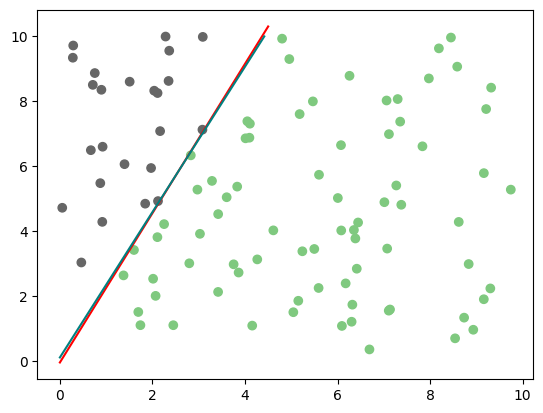

Learning rate: 0.1
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.006780147552490234s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-4.543419623062869, 2.005779151509242]
Bias: 1.3877787807814457e-16


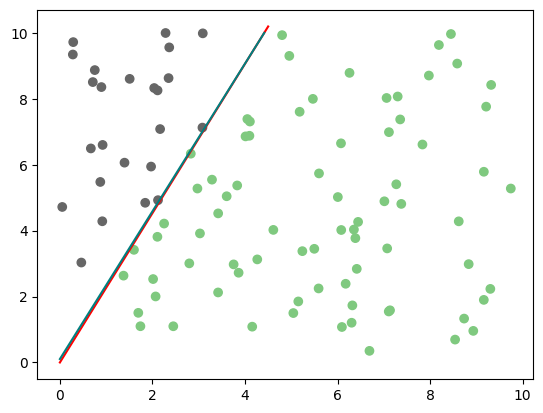

Learning rate: 0.5
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.0081329345703125s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-26.020153901407458, 11.343493652165565]
Bias: 0.5


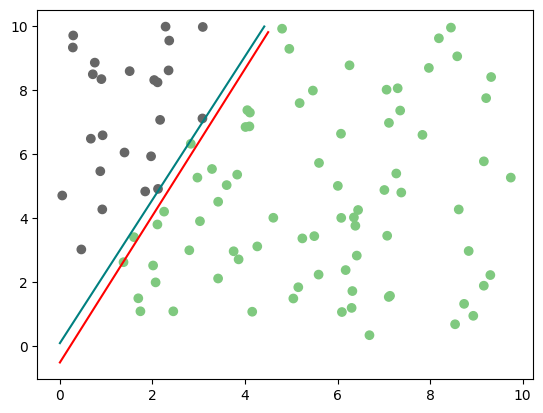

Learning rate: 1
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.002727985382080078s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-38.724881176875684, 16.89997020386109]
Bias: 0


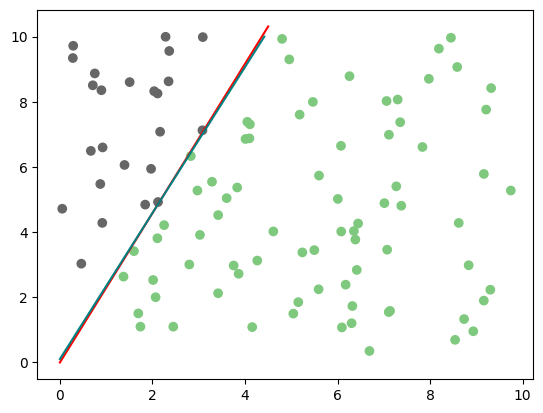

In [29]:
############################################################# Problem #1, different learning rates ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point):
    return self.activationFunction(self.multiply(point) + self.bias);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value):
    if value >= 0:
      return 1;
    return 0;

def pointGeneration(numPoints, lineSlope, lineY):
  #format for data: [[feature1val, feature2val,  ..., classification]]
  points = [];
  for i in range(numPoints):
    point1 = random.random()*10;
    point2 = random.random()*10
    points.append([point1, point2, classification(point1, point2, lineSlope, lineY)]);
  return points;

def classification(point1, point2, lineSlope, lineY):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = lineSlope*point1 + lineY;
  return int(calculated2 < point2);

def trainPerceptron(perc, points, slope, y, lv):
  continue_question = True;
  #w = [random.random() for i in range(len(points[0][:-1]))];
  w = [0, 0];
  perc.setWeights(w);
  perc.setBias(1);
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, slope, y, lv);

def epoch(perc, points, slope, y, lv):
  change = False;
  for p in points:
    a = perc.returnA(p[:-1]);
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  #generate a random line
  m = random.random()*3; #get a random slope between 0 and 3
  y = random.random()*6; #get a random line between 0 and 6
  learningVariable = 1; #set the learning variable

  #generate random points
  points = pointGeneration(300, m, y);

  #plot the points
  #info from: https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib
  plot.scatter([i[0] for i in points], [i[1] for i in points], c=[i[2] for i in points], cmap="Accent");
  plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
  plot.show();
  print(f"Line: y = {m}x + {y}");


  #generate test points
  testPoints = pointGeneration(100, m, y);

  #perform the different tests
  learnRate = [0.0001, 0.01, 0.05, 0.1, 0.5, 1];
  for lv in learnRate:
    #make a perceptron
    perc = Perceptron();

    #train the perceptron
    print(f"Learning rate: {lv}");
    startTime = time.time();
    trainPerceptron(perc, points, m, y, lv);
    endTime = time.time();
    print(f"Training time: {endTime-startTime}s");

    #test the perceptron
    cmatrix = testThePoints(perc, testPoints);
    print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(testPoints)}");
    print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

    #print the weights and bias
    print(f"Weights: {perc.weights}");
    print(f"Bias: {perc.bias}");

    #plot the perceptron
    #y = -w0/w1 x - bias
    plot.scatter([i[0] for i in testPoints], [i[1] for i in testPoints], c=[i[2] for i in testPoints], cmap="Accent");
    plot.plot([0, 4.5], [-perc.bias, -(perc.weights[0]/perc.weights[1])*4.5 - perc.bias], color="red");
    plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
    plot.show();


if __name__ == "__main__":
  main();

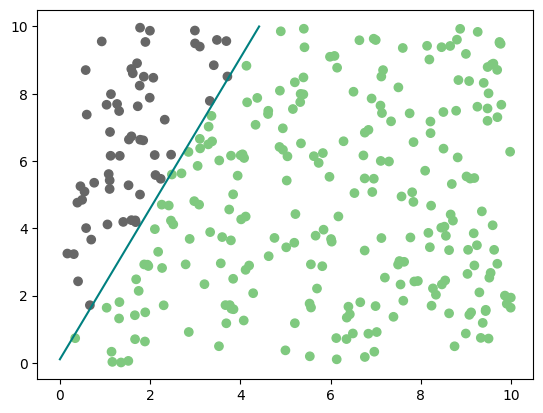

Line: y = 2.240921255168597x + 0.10437089980152892
Activation Function: Hard limit
Initial weights: [0, 0]
Initial bias: 1
Training time: 2.7767770290374756s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-0.6253515926583907, 0.2712152627810701]
Bias: 0.013400000000093792


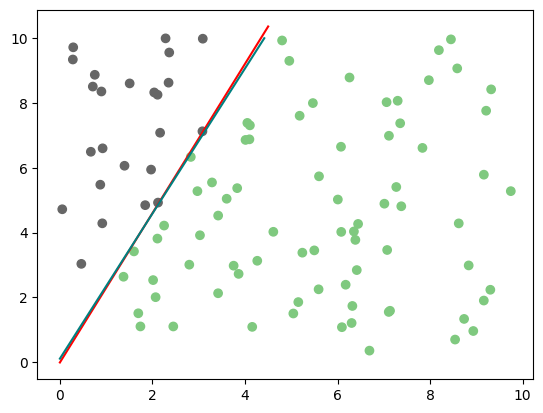

Activation Function: Linear
Initial weights: [0, 0]
Initial bias: 1
Training time: 1.7277076244354248s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-0.6253515926583907, 0.2712152627810701]
Bias: 0.013400000000093792


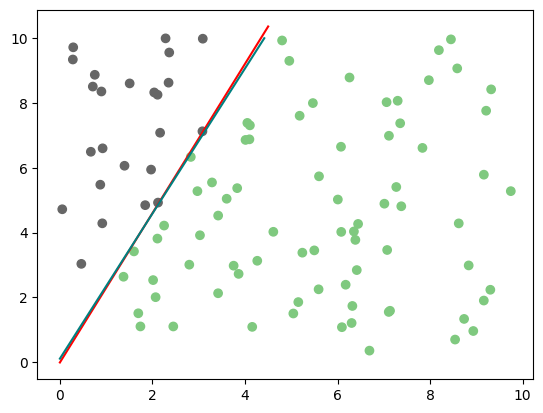

Activation Function: Log-sigmoid
Initial weights: [0, 0]
Initial bias: 1
Training time: 17.695824146270752s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|76 | 0 
 Actual: 1|0  | 24
Weights: [-4.9232940506781935, 2.135041735244462]
Bias: -6.800599999997395


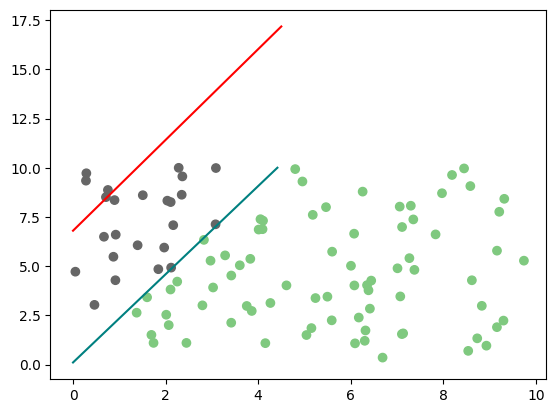

In [4]:
############################################################# Problem #1, different activation functions ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;
import math;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point, a):
    return self.activationFunction(self.multiply(point) + self.bias, a);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value, a):
    if a == 0:
      #hard limit
      if value >= 0:
        return 1;
      return 0;
    elif a == 1:
      #linear
      return value;
    #log-sigmoid
    #value is essentially 0 and it is causing errors
    if -value <= -30:
      return 1;
    #value is essentially infinity and it is causing errors
    if -value > 700:
      return 0;
    return 1/(1+math.e**(-value)) - 0.001;

def pointGeneration(numPoints, lineSlope, lineY):
  #format for data: [[feature1val, feature2val,  ..., classification]]
  points = [];
  for i in range(numPoints):
    point1 = random.random()*10;
    point2 = random.random()*10
    points.append([point1, point2, classification(point1, point2, lineSlope, lineY)]);
  return points;

def classification(point1, point2, lineSlope, lineY):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = lineSlope*point1 + lineY;
  return int(calculated2 < point2);

def trainPerceptron(perc, points, slope, y, lv, a):
  continue_question = True;
  #w = [random.random() for i in range(len(points[0][:-1]))];
  w = [0, 0];
  perc.setWeights(w);
  perc.setBias(1);
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, slope, y, lv, a);

def epoch(perc, points, slope, y, lv, a1):
  change = False;
  for p in points:
    a = int(perc.returnA(p[:-1], a1) > 0);
    #print (f"{perc.returnA(p[:-1], a1)}, {a}");
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points, a):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1], a) > 0;
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  #generate a random line
  m = random.random()*3; #get a random slope between 0 and 3
  y = random.random()*6; #get a random line between 0 and 6
  learningVariable = 0.0001; #set the learning variable

  #generate random points
  points = pointGeneration(300, m, y);

  #plot the points
  #info from: https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib
  plot.scatter([i[0] for i in points], [i[1] for i in points], c=[i[2] for i in points], cmap="Accent");
  plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
  plot.show();
  print(f"Line: y = {m}x + {y}");


  #generate test points
  testPoints = pointGeneration(100, m, y);

  #perform the different tests
  activationFunction = range(3);
  av = ["Hard limit", "Linear", "Log-sigmoid"];
  for a in activationFunction:
    #make a perceptron
    perc = Perceptron();

    #train the perceptron
    print(f"Activation Function: {av[a]}");
    startTime = time.time();
    trainPerceptron(perc, points, m, y, learningVariable, a);
    endTime = time.time();
    print(f"Training time: {endTime-startTime}s");

    #test the perceptron
    cmatrix = testThePoints(perc, testPoints, a);
    print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(testPoints)}");
    print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

    #print the weights and bias
    print(f"Weights: {perc.weights}");
    print(f"Bias: {perc.bias}");

    #plot the perceptron
    #y = -w0/w1 x - bias
    plot.scatter([i[0] for i in testPoints], [i[1] for i in testPoints], c=[i[2] for i in testPoints], cmap="Accent");
    plot.plot([0, 4.5], [-perc.bias, -(perc.weights[0]/perc.weights[1])*4.5 - perc.bias], color="red");
    plot.plot([0, (10-y)/m], [0*m+y, 10], color="teal");
    plot.show();


if __name__ == "__main__":
  main();

In [11]:
############################################################# Problem #1, different # of inputs ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point):
    return self.activationFunction(self.multiply(point) + self.bias);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value):
    if value >= 0:
      return 1;
    return 0;

def pointGeneration(numPoints, lineSlope, lineY):
  #format for data: [[feature1val, feature2val,  ..., classification]]
  points = [];
  for i in range(numPoints):
    point1 = random.random()*10;
    point2 = random.random()*10;
    point3 = random.random()*10;
    point4 = random.random()*10;
    point5 = random.random()*10;
    points.append([point1, point2, point3, point4, point5, classification(point1, point2, lineSlope, lineY)]);
  return points;

def classification(point1, point2, lineSlope, lineY):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = lineSlope*point1 + lineY;
  return int(calculated2 < point2);

def classificationNew(points, slopes, intercept):
  #classify the point as either above the line (1) or below the line (0)
  calculated2 = sum([points[i]*slopes[i] for i in range(len(points))]) + intercept;
  return int(calculated2 >= 0);

def trainPerceptron(perc, points, lv, num):
  continue_question = True;
  #w = [random.random() for i in range(len(points[0][:-1]))];
  w = [0]*num;
  perc.setWeights(w);
  perc.setBias(1);
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, lv);

def epoch(perc, points, lv):
  change = False;
  for p in points:
    a = perc.returnA(p[:-1]);
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  #generate a random line
  mx = random.random()*3; #get a random slope between 0 and 3
  my = random.random()*3;
  mz = random.random()*3;
  ma = random.random()*3;
  mb = random.random()*3;
  ms = [mx, my, mz, ma, mb];
  y = -random.random()*30; #get a random line between 0 and 6
  learningVariable = 1; #set the learning variable

  #generate random points
  points = pointGeneration(300, mx, y);
  print(f"Line: {mx}x + {my}y + {mz}z + {ma}a + {mb}b + {y} = 0");


  #generate test points
  testPoints = pointGeneration(100, mx, y);

  #perform the different tests
  for p in range(2, 6):
    #recalculate the correct answer
    points1 = [points[i][:p] + [classificationNew(points[i][:p], ms[:p], y)] for i in range(len(points))];
    testPoints1 = [testPoints[i][:p] + [classificationNew(testPoints[i][:p], ms[:p], y)] for i in range(len(testPoints))];

    #make a perceptron
    perc = Perceptron();

    #train the perceptron
    print(f"Number of points: {p}");
    startTime = time.time();
    trainPerceptron(perc, points1, learningVariable, p);
    endTime = time.time();
    print(f"Training time: {endTime-startTime}s");

    #test the perceptron
    cmatrix = testThePoints(perc, testPoints1);
    print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(testPoints1)}");
    print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

    #print the weights and bias
    print(f"Weights: {perc.weights}");
    print(f"Bias: {perc.bias}");
    print("-----------------------");


if __name__ == "__main__":
  main();

Line: 2.240921255168597x + 0.05218544990076446y + 0.3395476698035511z + 2.396538439632059a + 1.5661233696032144b + -13.265953851123788 = 0
Number of points: 2
Initial weights: [0, 0]
Initial bias: 1
Training time: 0.04335331916809082s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|61 | 0 
 Actual: 1|0  | 39
Weights: [35.54774812841659, 0.5939222267575524]
Bias: -210
-----------------------
Number of points: 3
Initial weights: [0, 0, 0]
Initial bias: 1
Training time: 0.08780288696289062s
Accuracy: 0.99
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|50 | 1 
 Actual: 1|0  | 49
Weights: [58.282202115973945, -0.4468195338779499, 6.859010186475071]
Bias: -329
-----------------------
Number of points: 4
Initial weights: [0, 0, 0, 0]
Initial bias: 1
Training time: 0.020278215408325195s
Accuracy: 0.95
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|14 | 3 
 Actual: 1|2  | 81
Weights: [25.888517201443378, -5.30252291413891, 1.25232321018166, 28.90546464260455]
Bias: -115
--------

Initial weights: [0, 0, 0, 0]
Initial bias: 1
Training time: 0.0028934478759765625s
Accuracy: 1.0
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|16 | 0 
 Actual: 1|0  | 14
Weights: [-2.1000000000000014, -4.5, 6.699999999999999, 3.0]
Bias: 0
Feature 1 (X) and Feature 2 (y)


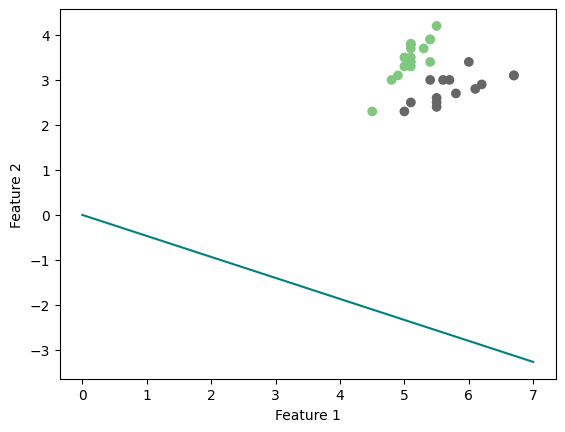

Feature 1 (X) and Feature 3 (y)


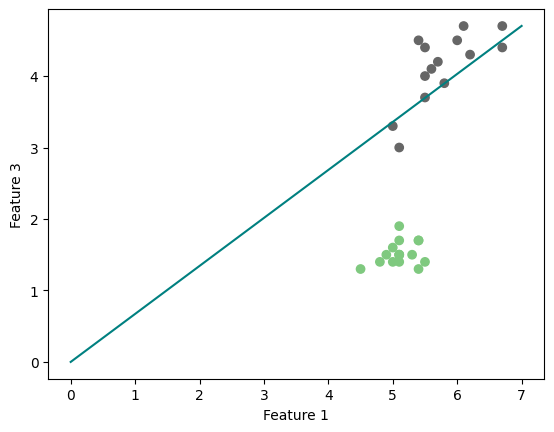

Feature 1 (X) and Feature 4 (y)


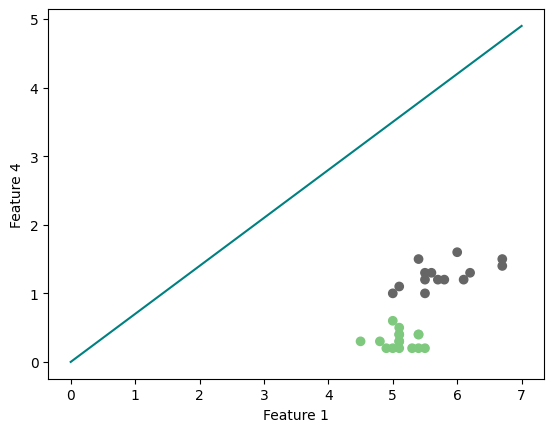

Feature 2 (X) and Feature 3 (y)


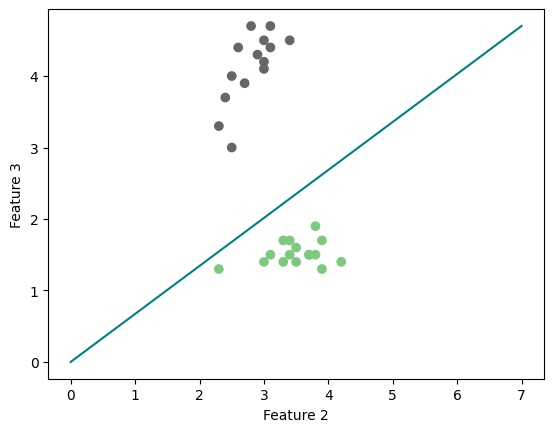

Feature 2 (X) and Feature 4 (y)


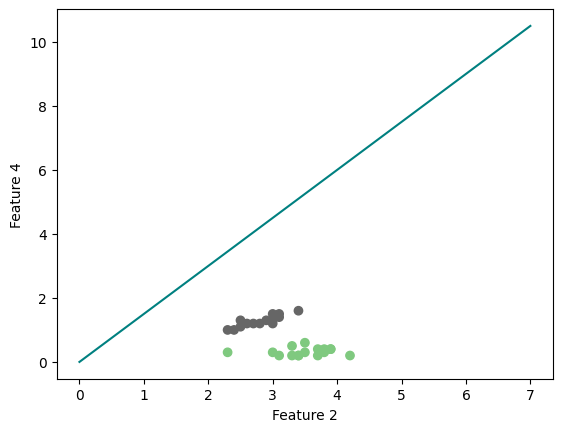

Feature 3 (X) and Feature 4 (y)


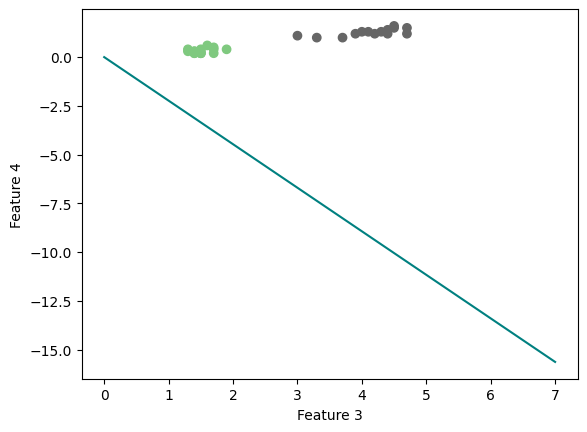

In [55]:
############################################################# Problem #2 ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;
from sklearn.datasets import load_iris;
from sklearn.model_selection import train_test_split;

class Perceptron:
  weights = [];
  bias = 0;

  def setBias(self, val):
    self.bias = val;
  def setWeights(self, newWeights):
    self.weights = newWeights;

  def adjustBias(self, errorRate, learningRate):
    biasNew = self.bias + errorRate*learningRate;
    if biasNew == self.bias:
      return False;
    self.bias = biasNew;
    return True;

  def adjustWeights(self, errorRate, learningRate, pt):
    weightsNew = [w + errorRate*learningRate*pt[i] for i, w in enumerate(self.weights)];
    if weightsNew == self.weights:
      return False;
    self.weights = weightsNew;
    return True;

  def returnA(self, point):
    return self.activationFunction(self.multiply(point) + self.bias);

  def multiply(self, point):
    return sum([self.weights[i] * point[i] for i in range(len(point))]);

  def activationFunction(self, value):
    if value >= 0:
      return 1;
    return 0;

def trainPerceptron(perc, points, lv, num):
  continue_question = True;
  #w = [random.random() for i in range(len(points[0][:-1]))];
  w = [0]*num;
  perc.setWeights(w);
  perc.setBias(1);
  print(f"Initial weights: {w}");
  print(f"Initial bias: {perc.bias}");
  while continue_question:
    continue_question = epoch(perc, points, lv);

def epoch(perc, points, lv):
  change = False;
  for p in points:
    a = perc.returnA(p[:-1]);
    error = p[-1] - a;
    wChange = perc.adjustWeights(error, lv, p[:-1]);
    bChange = perc.adjustBias(error, lv);
    if wChange or bChange:
      change = True;
  return change;

def testThePoints(perc, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = perc.returnA(p[:-1]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];


def main():
  random.seed(1880333);
  learningVariable = 1; #set the learning variable

  #load iris data
  data1 = load_iris();
  data, target = data1.data, data1.target;

  #restructure data and get rid of virginica (2) class
  points = [[float(j) for j in data[i]] + [int(target[i])] for i in range(len(data)) if target[i] != 2];

  #do the train, test split
  train, test = train_test_split(points, test_size = 0.3, random_state=1880333);

  #make a perceptron
  perc = Perceptron();

  #train the perceptron
  startTime = time.time();
  trainPerceptron(perc, train, learningVariable, 4);
  endTime = time.time();
  print(f"Training time: {endTime-startTime}s");

  #test the perceptron
  cmatrix = testThePoints(perc, test);
  print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(test)}");
  print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");

  #print the weights and bias
  print(f"Weights: {perc.weights}");
  print(f"Bias: {perc.bias}");

  #show 1 vs 2
  print("Feature 1 (X) and Feature 2 (y)");
  plot.scatter([i[0] for i in test], [i[1] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[0]/perc.weights[1])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 1");
  plot.ylabel("Feature 2");
  plot.show();

  #show 1 vs 3
  print("Feature 1 (X) and Feature 3 (y)");
  plot.scatter([i[0] for i in test], [i[2] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[1]/perc.weights[2])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 1");
  plot.ylabel("Feature 3");
  plot.show();

  #show 1 vs 4
  print("Feature 1 (X) and Feature 4 (y)");
  plot.scatter([i[0] for i in test], [i[3] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[0]/perc.weights[3])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 1");
  plot.ylabel("Feature 4");
  plot.show();

  #show 2 vs 3
  print("Feature 2 (X) and Feature 3 (y)");
  plot.scatter([i[1] for i in test], [i[2] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[1]/perc.weights[2])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 2");
  plot.ylabel("Feature 3");
  plot.show();

  #show 2 vs 4
  print("Feature 2 (X) and Feature 4 (y)");
  plot.scatter([i[1] for i in test], [i[3] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[1]/perc.weights[3])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 2");
  plot.ylabel("Feature 4");
  plot.show();

  #show 3 vs 4
  print("Feature 3 (X) and Feature 4 (y)");
  plot.scatter([i[2] for i in test], [i[3] for i in test], c=[i[-1] for i in test], cmap="Accent");
  plot.plot([0, 7], [-perc.bias, -(perc.weights[2]/perc.weights[3])*7 - perc.bias], color="teal");
  plot.xlabel("Feature 3");
  plot.ylabel("Feature 4");
  plot.show();




if __name__ == "__main__":
  main();

In [54]:
############################################################# Problem #3 ###############################################################
import random;
import matplotlib.pyplot as plot;
import time;
from sklearn.datasets import load_iris;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import Perceptron;

def testThePoints(model, points):
  correct1 = 0;
  correct0 = 0;
  #incorrect0 = incorrectly classified as 0
  incorrect0 = 0;
  incorrect1 = 0;
  total = len(points);
  for p in points:
    outcome = model.predict([p[:-1]]);
    if outcome == p[-1] and outcome == 1:
      correct1 += 1;
    elif outcome == p[-1]:
      correct0 += 1;
    elif outcome == 1:
      incorrect0 += 1;
    else: incorrect1 += 1;
  return [correct0, incorrect1, incorrect0, correct1];

def main():
  random.seed(1880333);
  learningVariable = 1; #set the learning variable

  #load iris data
  data1 = load_iris();
  data, target = data1.data, data1.target;

  #restructure data and get rid of virginica (2) class
  points = [[float(j) for j in data[i]] + [int(target[i])] for i in range(len(data)) if target[i] != 2];

  #do the train, test split
  train, test = train_test_split(points, test_size = 0.3, random_state=1880333);


  #train the perceptron
  startTime = time.time();
  clf = Perceptron(random_state = 1880333, alpha = 1);
  trainX = [t[:-1] for t in train];
  trainY = [t[-1] for t in train];
  clf.fit(trainX, trainY);
  endTime = time.time();
  print(f"Training time: {endTime-startTime}s");

  #test the perceptron
  cmatrix = testThePoints(clf, test);
  print(f"Accuracy: {(cmatrix[0]+cmatrix[3])/len(test)}");
  print(f"Confusion Matrix: \nPredicted: 0    1\n Actual: 0|{cmatrix[0]} | {cmatrix[1]} \n Actual: 1|{cmatrix[2]}  | {cmatrix[3]}");


if __name__ == "__main__":
  main();

Training time: 0.0025107860565185547s
Accuracy: 0.9666666666666667
Confusion Matrix: 
Predicted: 0    1
 Actual: 0|16 | 1 
 Actual: 1|0  | 13
